## Intro

Blah, blah, blah, blah, BIAS. 
Blah, blah, blah, blah, VARIANCE. 
Blah, blah, OMG, TRADEOFF!! - Tom France

Looks like that masters degree is really paying off! - Stephen


In [104]:
import math
from sklearn import cross_validation, linear_model
from sklearn.cross_validation import train_test_split
from pylab import *
import random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

xmin = -math.pi
xmax = math.pi
ymin = -2
ymax = 2
seedMap = [123, 232, 13, 100, 344, 45, 71, 99, 199, 80]
numberOfTrainingSets = seedMap.__len__()
polynomialDegrees = [1, 2, 3, 10, 17]
dataPointsPerTrainingSet = 50
testSplit = 0.2

In [105]:
# generate noisy data from an underlying function
def createSineData(n, seed):
    random.seed(seed) # for reproducibility
    x = pd.Series([random.uniform(-math.pi, math.pi) for i in range(n)])
    f = np.vectorize(lambda x: math.sin(x)) # our true function
    y = x.apply(f) # generate our labels/outputs
    e = pd.Series([random.gauss(0,1.0/3.0) for i in range(n)]) # add some noise
    y = y + e
    return np.stack((x, y), axis=-1)

# Calculate Training MSE
def MSE_ByComplexity(dataSet, solutionSet):
      avgMSE = {}
      for i in range(numberOfTrainingSets):
            x = dataSet[i]['x']
            y = dataSet[i]['y']
            avgMSE[i] = {}
            for s in range(polynomialDegrees.__len__()):
                  avgMSE[i][s] = np.mean((np.polyval(solutionSet[i][s], x) - y) ** 2)

      return avgMSE

def transformArray(array, len):
      transformedArray = {}
      for i in range(len):
            transformedArray[i] = {}
            for j in range(numberOfTrainingSets):
                  transformedArray[i][j] = array[j][i]
      return transformedArray
#For a given solution, average squared error across all datasets
def MSE_toPlot(xpoints, solutionSet, solutionIndex, index):
      meanSquaredError = {}
      result = {}
      len = xpoints.__len__()
      x = pd.Series(xpoints)
      f = np.vectorize(lambda x: math.sin(x))
      y = x.apply(f)
      for i in range(numberOfTrainingSets):
            yhat = solutions[i][solutionIndex](xpoints)
            meanSquaredError[i]= (yhat - y) ** 2
      transformedMeanSquareError = transformArray(meanSquaredError, len)
      for row in range(len):
            sum = 0
            for column in range(numberOfTrainingSets):
                  sum = sum + transformedMeanSquareError[row][column]
            result[row] = sum/numberOfTrainingSets
      return result

def avgFittedFunction(solutionSet):
      avgEstimators = {}
      for s in range(polynomialDegrees.__len__()):
            sumEst = 0
            for i in range(numberOfTrainingSets):
                  sumEst = sumEst + solutionSet[i][s]
            avgEstimators[s] = sumEst / numberOfTrainingSets
      return avgEstimators
#Not sure if this one is riight......
def solutionBias_ByComplexity(dataSetTest, solutionSet):
      solutionBias = {}
      avgEstimators = avgFittedFunction(solutionSet)
      for s in range(polynomialDegrees.__len__()):
            solutionBiasPerDataSet = []
            x = pd.Series([random.uniform(-math.pi, math.pi) for i in range(dataPointsPerTrainingSet)])
            f = np.vectorize(lambda x: math.sin(x))  # our true function
            y = x.apply(f)
            solutionBias[s] = np.mean(np.polyval(avgEstimators[s], x)-y)
      return solutionBias

dataSetsTrain = {}
dataSetsTest = {}
for i in range(numberOfTrainingSets):
      dataSetsTrain[i] = {}
      dataSetsTest[i] = {}
      ds = createSineData(dataPointsPerTrainingSet, seedMap[i])
      train, test = train_test_split(ds, test_size=testSplit)
      dataSetsTrain[i]['x'] = train[:,0]
      dataSetsTrain[i]['y'] = train[:,1]
      dataSetsTest[i]['x'] = test[:,0]
      dataSetsTest[i]['y'] = test[:,1]

#Train solutions for each training data set across several degrees of polynomial complexity
solutions = {}
for x in range(numberOfTrainingSets):
      solutions[x]={}
      for s in range(polynomialDegrees.__len__()):
            x1 = dataSetsTrain[x]['x']
            y1 = dataSetsTrain[x]['y']
            func = np.polyfit(x1, y1, polynomialDegrees[s])
            solutions[x][s] = poly1d(func)

## One of our data sets

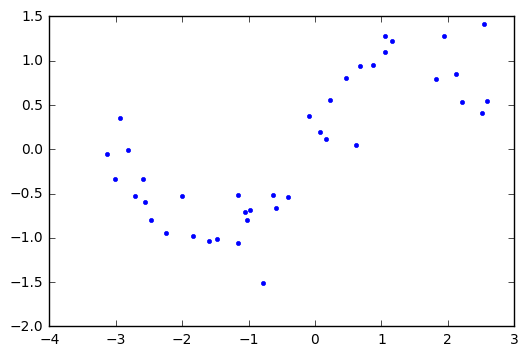

In [106]:
index = 0
x = dataSetsTrain[index]['x']
y = dataSetsTrain[index]['y']

_ = plt.plot(x, y, '.')

## Fitting a 0-degree Polynomial

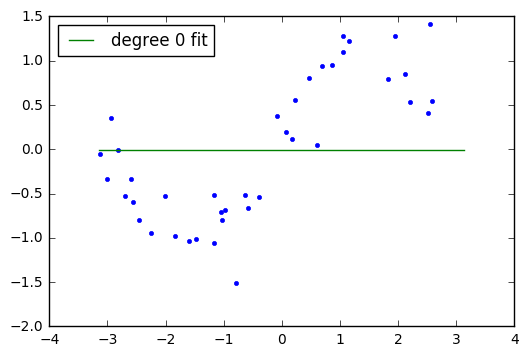

In [107]:
p0 = np.poly1d(np.polyfit(x, y, 0))
xpoints = np.linspace(-math.pi, math.pi, 100)
_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p0(xpoints), '-', label = 'degree 0 fit')
_ = plt.legend(loc='upper left')

## Fitting a 1-degree Polynomial

Training MSE: 0.313350156144


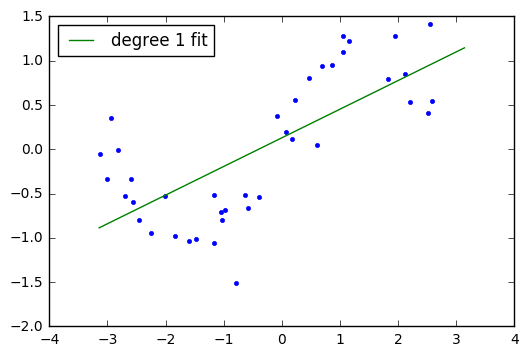

In [108]:
index = 0
solutionIndex = 0
p1 = solutions[index][solutionIndex]
xpoints = np.linspace(-math.pi, math.pi, 100)

_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p1(xpoints), '-', label = 'degree 1 fit')
_ = plt.legend(loc='upper left')

print("Training MSE: " + str(training_MSE_ByComplexity(dataSetsTrain, solutions)[index][solutionIndex]))

## Fitting a 3-degree Polynomial

Training MSE: 0.0957978627612


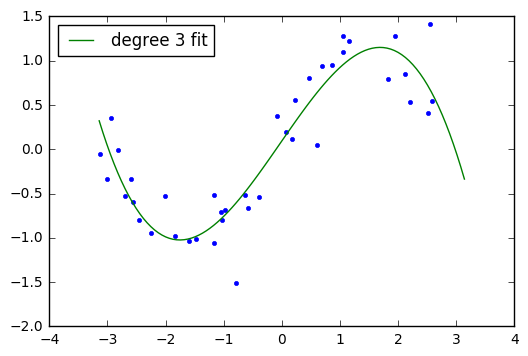

In [109]:
solutionIndex = 2
p3 = p1 = solutions[index][solutionIndex]

_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p3(xpoints), '-', label = 'degree 3 fit')
_ = plt.legend(loc='upper left')
print("Training MSE: " + str(training_MSE_ByComplexity(dataSetsTrain, solutions)[index][solutionIndex]))

## Fitting a 17-degree Polynomial

Training MSE: 0.0538623867894


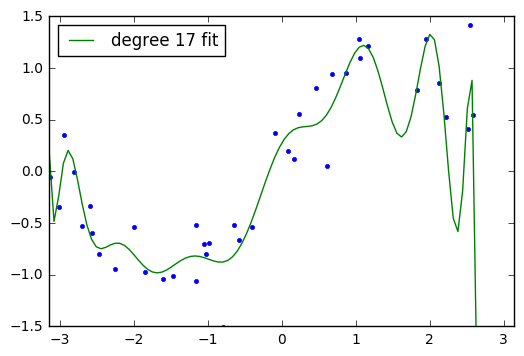

In [110]:
solutionIndex = 4
p10 = solutions[index][solutionIndex]

axes = plt.gca()
axes.set_xlim(-math.pi,math.pi)
axes.set_ylim(-1.5,1.5)

_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p10(xpoints), '-', label = 'degree 17 fit')
_ = plt.legend(loc='upper left')
print("Training MSE: " + str(training_MSE_ByComplexity(dataSetsTrain, solutions)[index][solutionIndex]))

In [111]:
trainingMSE = training_MSE_ByComplexity(dataSetsTrain, solutions)
for s in range(len(polynomialDegrees)) :
      print("Training MSE for degree " + str(polynomialDegrees[s]) + ": " + str(trainingMSE[index][s]))

Training MSE for degree 1: 0.313350156144
Training MSE for degree 2: 0.272073124534
Training MSE for degree 3: 0.0957978627612
Training MSE for degree 10: 0.0755001925556
Training MSE for degree 17: 0.0538623867894


In [112]:
testMSE = MSE_ByComplexity(dataSetsTest, solutions)
for s in range(len(polynomialDegrees)) :
      print("Test MSE: " + str(polynomialDegrees[s]) + ": " + str(testMSE[index][s]))

Test MSE: 1: 0.249114813706
Test MSE: 2: 0.201014230299
Test MSE: 3: 0.0680975346997
Test MSE: 10: 0.0731049274933
Test MSE: 17: 0.250777958445


## Polynomial complexity and training error

(0, 0.5)

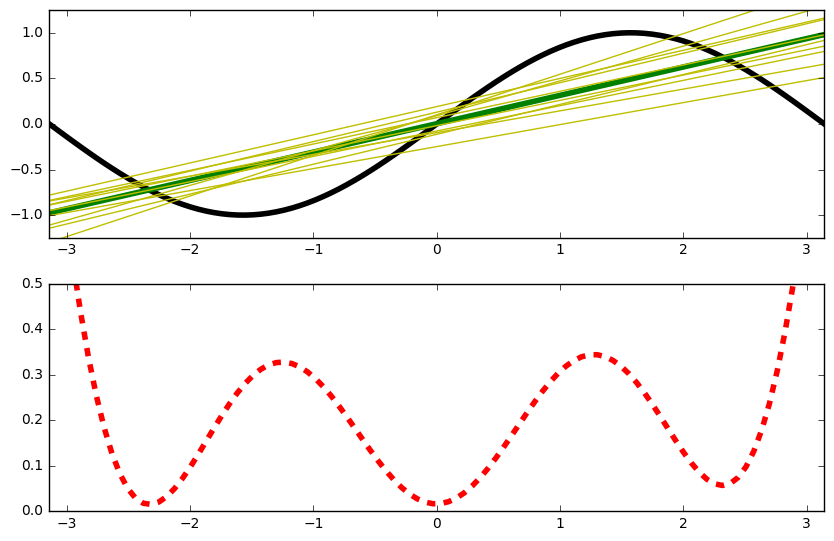

In [135]:
solutionIndex = 0
error = MSE_toPlot(xpoints, solutions, solutionIndex, index)
ax1, ax2 = plt.subplots(2,1,figsize=(10,10))
ax1 = plt.subplot(311)
ax1.plot(xpoints, sin(xpoints), 'k-', linewidth=4)
ax1.plot(xpoints, avgFittedFunction(solutions)[solutionIndex](xpoints), 'g-', linewidth=4)
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([-1.25,1.25])
for i in range(numberOfTrainingSets):
      ax1.plot(xpoints,solutions[i][solutionIndex](xpoints),'y-')
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(xpoints, pd.Series(error), 'r--', linewidth=4)
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([0,.5])



(0, 0.5)

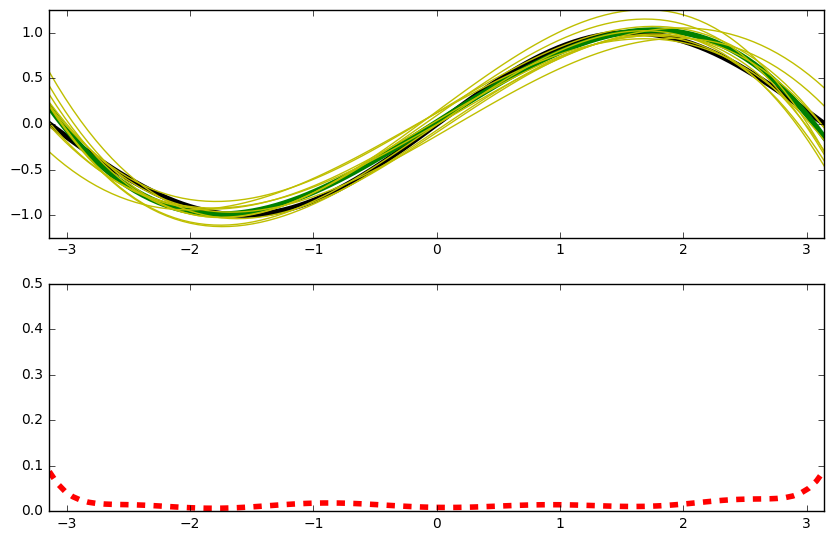

In [136]:
solutionIndex = 2
error = MSE_toPlot(xpoints, solutions, solutionIndex, index)
ax1, ax2 = plt.subplots(2,1,figsize=(10,10))
ax1 = plt.subplot(311)
ax1.plot(xpoints, sin(xpoints), 'k-', linewidth=4)
ax1.plot(xpoints, avgFittedFunction(solutions)[solutionIndex](xpoints), 'g-', linewidth=4)
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([-1.25,1.25])
for i in range(numberOfTrainingSets):
      ax1.plot(xpoints,solutions[i][solutionIndex](xpoints),'y-')
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(xpoints, pd.Series(error), 'r--', linewidth=4)
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([0,.5])

(0, 0.5)

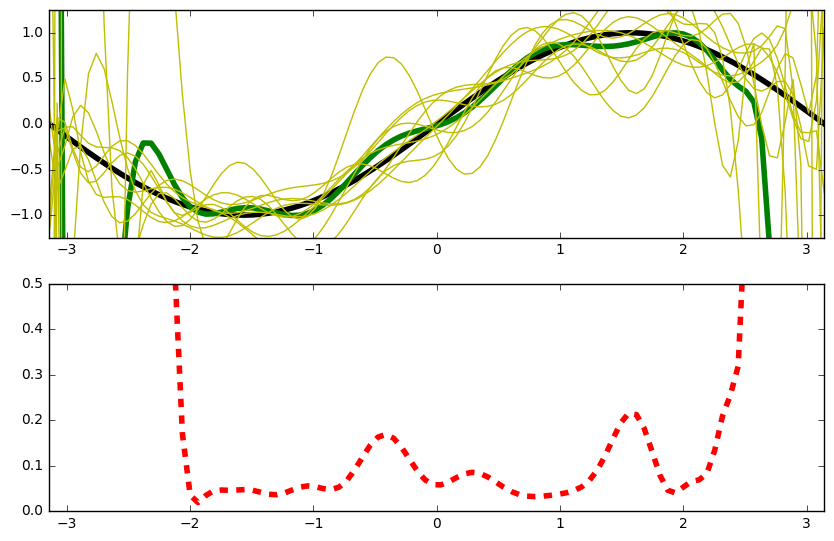

In [137]:
solutionIndex = 4
error = MSE_toPlot(xpoints, solutions, solutionIndex, index)
ax1, ax2 = plt.subplots(2,1,figsize=(10,10))
ax1 = plt.subplot(311)
ax1.plot(xpoints, sin(xpoints), 'k-', linewidth=4)
ax1.plot(xpoints, avgFittedFunction(solutions)[solutionIndex](xpoints), 'g-', linewidth=4)
ax1.set_xlim([xmin,xmax])
ax1.set_ylim([-1.25,1.25])
for i in range(numberOfTrainingSets):
      ax1.plot(xpoints,solutions[i][solutionIndex](xpoints),'y-')
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(xpoints, pd.Series(error), 'r--', linewidth=4)
ax2.set_xlim([xmin,xmax])
ax2.set_ylim([0,.5])

## Decomposition of MSE into Variance, Bias, and Irreducible error

![title](../Images/BiasVarianceDecomposition.svg

![title](../Images/BiasVarianceDecomposition.svg)

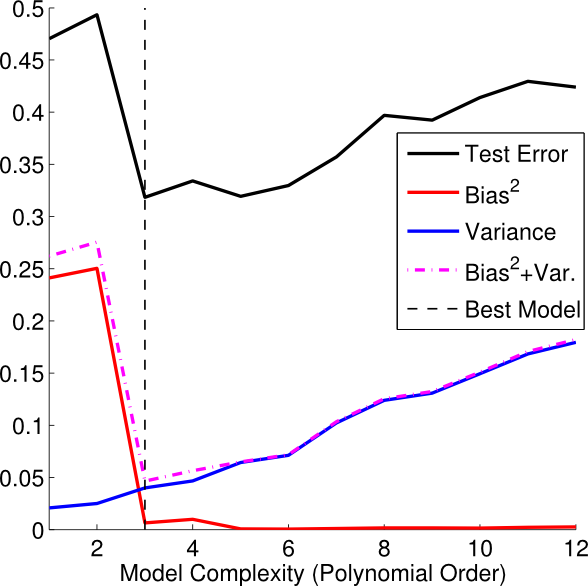

In [116]:
from IPython.core.display import Image, display
display(Image('https://theclevermachine.files.wordpress.com/2013/04/bias-variance-tradeoff.png', width=600, unconfined=True))

## Effect of sample size on model complexity

### Fitting a 18-degree Polynomial, n = 30

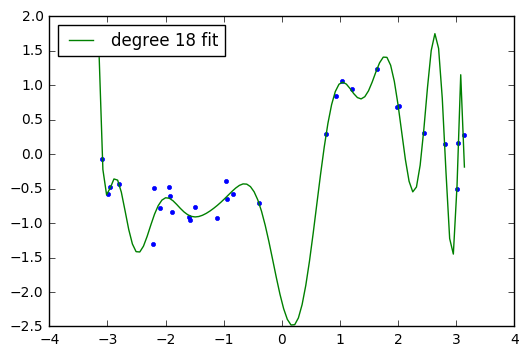

In [117]:
ds = createSineData(30, seedMap[6])
x = ds[:,0]
y = ds[:,1]
xpoints = np.linspace(-math.pi, math.pi, 100)

p6 = np.poly1d(np.polyfit(x, y, 18))
_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p6(xpoints), '-', label = 'degree 18 fit')
_ = plt.legend(loc='upper left')

### Fitting a 18-degree Polynomial, n = 100

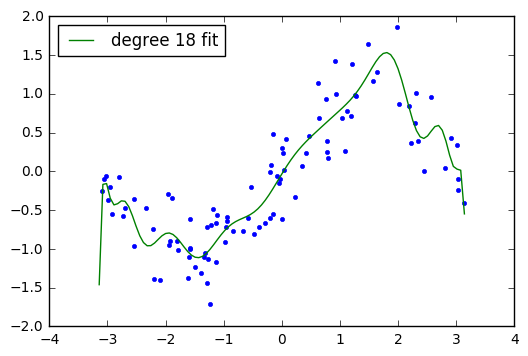

In [118]:
ds = createSineData(100, seedMap[6])
x = ds[:,0]
y = ds[:,1]
xpoints = np.linspace(-math.pi, math.pi, 100)

p18 = np.poly1d(np.polyfit(x, y, 18))
_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p18(xpoints), '-', label = 'degree 18 fit')
_ = plt.legend(loc='upper left')

### Fitting a 18-degree Polynomial, n = 300

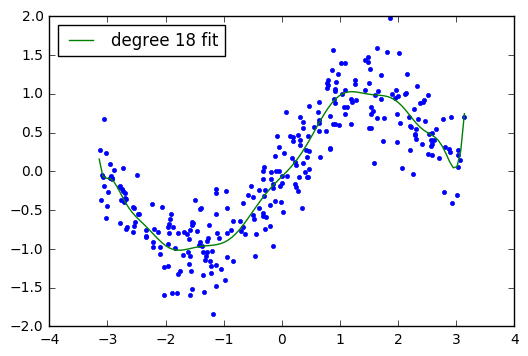

In [119]:
ds = createSineData(300, seedMap[6])
x = ds[:,0]
y = ds[:,1]
xpoints = np.linspace(-math.pi, math.pi, 100)

p18 = np.poly1d(np.polyfit(x, y, 18))
_ = plt.plot(x, y, '.')
_ = plt.plot(xpoints, p18(xpoints), '-', label = 'degree 18 fit')
_ = plt.legend(loc='upper left')

The extra data (evenly distributed) constrains the function